Error using surf (line 82)
Data dimensions must agree.


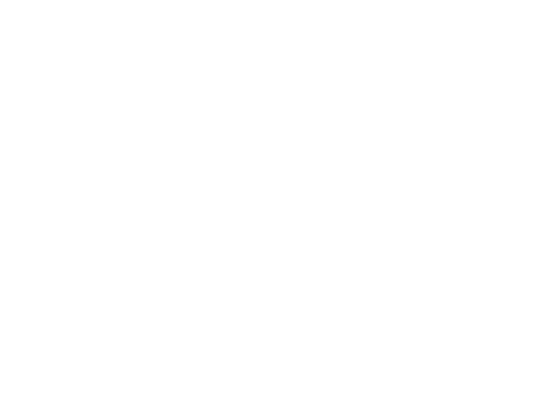

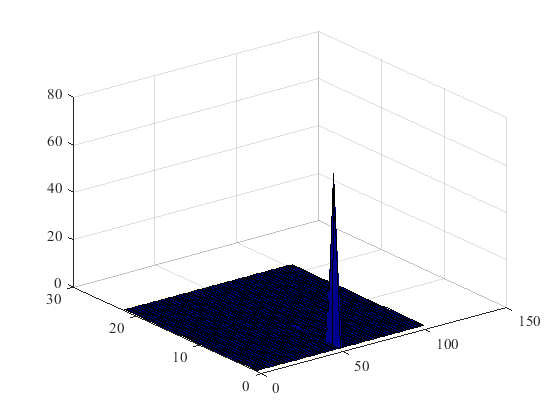

In [13]:
clear all;
cd /home/jacob/panning_project/test_programs
load mats/test_MMDL_82iter_18April.mat
X = savedX{38};
X=X';
regVal=0.5e-4;
covType=0;
plotFlag=2;
fs=44100;

[bestk,bestpp,bestmu,bestcov,dl,countf,mindl,safemu, safemuMean, safemuSelected] = mixtures4_remove_outliers(X,2,25,regVal,1e-4,covType,plotFlag,fs); % regVal was 1e-4
%xy = meshgrid(-1:0.1:1,-1:0.1:1);

     for i=1:bestk
        semi_indic(i,:) = multinorm(X,bestmu(:,i),bestcov(:,:,i));
        indic(i,:) = semi_indic(i,:)*bestpp(i);
     end
%figure; 
   % surf(xy,indic)
xx=[];
yy=[];
semi_indic=[];
indic=[];
res=10;
for x=linspace(-1,1,res)
    xx(ii:ii+res-1)=x;
    yy(ii:ii+res-1) = linspace(-1,1,res);
    ii=ii+res;
end
   
for i=1:bestk
    semi_indic(i,:) = multinorm([xx; yy],bestmu(:,i),bestcov(:,:,i));
    indic(i,:) = semi_indic(i,:)*bestpp(i);
end
figure;
surf(indic)


A = sum(indic);
A = repmat(A,res,res);

figure; surf(xx,yy,A)

%figure;
%obj = gmdistribution(bestmu',bestcov,bestpp);
%x = -1:.05:1; y = x; n=length(x); a=zeros(n,n);
%for i = 1:n, for j = 1:n, a(i,j) = pdf(obj,[x(i) y(j)]); end, end;
%surfc(x*45,y*150e-6*fs,a+10,'FaceColor','interp','EdgeColor','none','FaceLighting','phong')